### 🛒 자전거 관련 스포츠 마켓 RFM 분석

### ❗ 기획 - 재구매가 많이 이루어지는 고객들의 성향을 분석하고 해당 고객들의 충성도를 높이기위한 전략을 세울수도 있고 건강과 관련있는 스포츠의 특성을 살려 홍보하여 구매를 유도할수 있다.

ProductKey: 상품 고유 식별자  
OrderDate: 상품을 구매한 날짜  
CustomerKey: 구매자 고유 식별자  
SalesAmount: 물품 총구매 금액  
BirthDate: 사용자의 생년월일  
Gender: 사용자의 성별  
YearlyIncome: 사용자의 연봉  
Occupation: 사용자의 직업  
CustomerCountry: 사용자의 거주지  
ProductName: 상품 이름  
Category: 상품 카테고리  

In [1]:
import pandas as pd
import numpy as np

co_df = pd.read_csv('./datasets/Customer.csv')
po_df = pd.read_csv('./datasets/Product.csv')
sa_df = pd.read_csv('./datasets/Sales.csv')


In [2]:
display(co_df)
display(po_df)
display(sa_df)


CustomerKey  FirstName LastName            FullName   BirthDate  \
0            11000        Jon     Yang           Yang, Jon  1966-04-08   
1            11001     Eugene    Huang       Huang, Eugene  1965-05-14   
2            11002      Ruben   Torres       Torres, Ruben  1965-08-12   
3            11003    Christy      Zhu        Zhu, Christy  1968-02-15   
4            11004  Elizabeth  Johnson  Johnson, Elizabeth  1968-08-08   
...            ...        ...      ...                 ...         ...   
18479        29479      Tommy     Tang         Tang, Tommy  1958-07-04   
18480        29480       Nina     Raji          Raji, Nina  1960-11-10   
18481        29481       Ivan     Suri          Suri, Ivan  1960-01-05   
18482        29482    Clayton    Zhang      Zhang, Clayton  1959-03-05   
18483        29483      Jésus  Navarro      Navarro, Jésus  1959-12-08   

      MaritalStatus Gender  YearlyIncome  TotalChildren  NumberChildrenAtHome  \
0                 M      M         90000              2                     0   
1                 S      M         60000              3                     3   
2                 M      M         60000              3                     3   
3                 S      F         70000              0                     0   
4                 S      F         80000              5                     5   
...             ...    ...           ...            ...                   ...   
18479             M      M         30000              1                     0   
18480             S      F         30000              3                     0   
18481             S      M         30000              3                     0   
18482             M      M         30000              3                     0   
18483             M      M         30000              0                     0   

       ...    Occupation HouseOwnerFlag  NumberCarsOwned  \
0      ...  Professional              1                0   
1      ...  Professional              0                1   
2      ...  Professional              1                1   
3      ...  Professional              0                1   
4      ...  Professional              1                4   
...    ...           ...            ...              ...   
18479  ...      Clerical              1                0   
18480  ...      Clerical              1                0   
18481  ...      Clerical              0                0   
18482  ...      Clerical              1                0   
18483  ...      Clerical              1                0   

                    AddressLine1 DateFirstPurchase CommuteDistance  \
0                3761 N. 14th St        2005-07-22       1-2 Miles   
1                     2243 W St.        2005-07-18       0-1 Miles   
2               5844 Linden Land        2005-07-10       2-5 Miles   
3               1825 Village Pl.        2005-07-01      5-10 Miles   
4            7553 Harness Circle        2005-07-26       1-2 Miles   
...                          ...               ...             ...   
18479          111, rue Maillard        2007-03-08       0-1 Miles   
18480          9 Katherine Drive        2008-01-18       0-1 Miles   
18481                Knaackstr 4        2006-02-13       0-1 Miles   
18482     1080, quai de Grenelle        2007-03-22       0-1 Miles   
18483  244, rue de la Centenaire        2007-03-13       0-1 Miles   

           CustomerCity CustomerStateCode      CustomerState CustomerCountry  
0           Rockhampton               QLD         Queensland       Australia  
1               Seaford               VIC           Victoria       Australia  
2                Hobart               TAS           Tasmania       Australia  
3            North Ryde               NSW    New South Wales       Australia  
4            Wollongong               NSW    New South Wales       Australia  
...                 ...               ...                ...             ...  
18479        Versailles       

ProductKey            ProductName      SubCategory    Category  \
0             1        Adjustable Race              NaN         NaN   
1             2           Bearing Ball              NaN         NaN   
2             3        BB Ball Bearing              NaN         NaN   
3             4  Headset Ball Bearings              NaN         NaN   
4             5                  Blade              NaN         NaN   
..          ...                    ...              ...         ...   
601         602      ML Bottom Bracket  Bottom Brackets  Components   
602         603      HL Bottom Bracket  Bottom Brackets  Components   
603         604     Road-750 Black, 44       Road Bikes       Bikes   
604         605     Road-750 Black, 48       Road Bikes       Bikes   
605         606     Road-750 Black, 52       Road Bikes       Bikes   

    StandardCost  Color ListPrice  DaysToManufacture ProductLine  \
0            NaN    NaN       NaN                  0         NaN   
1            NaN    NaN       NaN                  0         NaN   
2            NaN    NaN       NaN                  1         NaN   
3            NaN    NaN       NaN                  0         NaN   
4            NaN    NaN       NaN                  1         NaN   
..           ...    ...       ...                ...         ...   
601        44.95    NaN    101.24                  1         NaN   
602        53.94    NaN    121.49                  1         NaN   
603       343.65  Black    539.99                  4        Road   
604       343.65  Black    539.99                  4        Road   
605       343.65  Black    539.99                  4        Road   

             ModelName                                              Photo  \
0                  NaN  http://www.avising.com/me/LearnPBI/DataSources...   
1                  NaN  http://www.avising.com/me/LearnPBI/DataSources...   
2                  NaN  http://www.avising.com/me/LearnPBI/DataSources...   
3                  NaN  http://www.avising.com/me/LearnPBI/DataSources...   
4                  NaN  http://www.avising.com/me/LearnPBI/DataSources...   
..                 ...                                                ...   
601  ML Bottom Bracket  http://www.avising.com/me/LearnPBI/DataSources...   
602  HL Bottom Bracket  http://www.avising.com/me/LearnPBI/DataSources...   
603           Road-750  http://www.avising.com/me/LearnPBI/DataSources...   
604           Road-750  http://www.avising.com/me/LearnPBI/DataSources...   
605           Road-750  http://www.avising.com/me/LearnPBI/DataSources...   

                                    ProductDescription StartDate  
0                                                  NaN  6/1/1998  
1                                                  NaN  6/1/1998  
2                                                  NaN  6/1/1998  
3                                                  NaN  6/1/1998  
4                                                  NaN  6/1/1998  
..                                                 ...       ...  
601       Aluminum alloy cups; large diameter spindle.  7/1/2007  
602             Aluminum alloy cups and a hollow axle.  7/1/2007  
603  Entry level adult bike; offers a comfortable r...  7/1/2007  
604  Entry level adult bike; offers a comfortable r...  7/1/2007  
605  Entry level adult bike; offers a comfortable r...  7/1/2007  

[606 rows x 13 columns]

ProductKey   OrderDate  ShipDate  CustomerKey  PromotionKey  \
0             310    1/1/2014  1/8/2014        21768             1   
1             346    1/1/2014  1/8/2014        28389             1   
2             346    1/1/2014  1/8/2014        25863             1   
3             336    1/1/2014  1/8/2014        14501             1   
4             346    1/1/2014  1/8/2014        11003             1   
...           ...         ...       ...          ...           ...   
58184         561  12/30/2016  1/7/2017        13650             1   
58185         584  12/30/2016  1/7/2017        26916             1   
58186         605  12/30/2016  1/7/2017        27473             1   
58187         538  12/30/2016  1/7/2017        27473             1   
58188         490  12/30/2016  1/7/2017        27473             1   

       SalesTerritoryKey SalesOrderNumber  SalesOrderLineNumber  \
0                      6          SO43697                     1   
1                      7          SO43698                     1   
2                      1          SO43699                     1   
3                      4          SO43700                     1   
4                      9          SO43701                     1   
...                  ...              ...                   ...   
58184                  9          SO74145                     1   
58185                  9          SO74146                     1   
58186                  9          SO74147                     1   
58187                  9          SO74147                     2   
58188                  9          SO74147                     3   

       OrderQuantity UnitPrice TotalProductCost SalesAmount  TaxAmt  
0                  2  1,789.14         2,171.29    3,578.27  286.26  
1                  2  1,700.00         1,912.15    3,399.99  272.00  
2                  2  1,700.00         1,912.15    3,399.99  272.00  
3                  2    349.55           413.15       699.1   55.93  
4                  2  1,700.00         1,912.15    3,399.99  272.00  
...              ...       ...              ...         ...     ...  
58184              1  2,384.07         1,481.94    2,384.07  190.73  
58185              1    539.99           343.65      539.99   43.20  
58186              1    539.99           343.65      539.99   43.20  
58187              1     21.49             8.04       21.49    1.72  
58188              1     53.99            41.57       53.99    4.32  

[58189 rows x 13 columns]

In [3]:
columns_to_keep = ['CustomerKey', 'BirthDate', 'Gender', 'YearlyIncome', 'Occupation', 
                   'CustomerCountry']

co_df = co_df[columns_to_keep]
co_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerKey      18484 non-null  int64 
 1   BirthDate        18484 non-null  object
 2   Gender           18484 non-null  object
 3   YearlyIncome     18484 non-null  int64 
 4   Occupation       18484 non-null  object
 5   CustomerCountry  18484 non-null  object
dtypes: int64(2), object(4)
memory usage: 866.6+ KB


In [4]:
columns_to_keep = ['ProductKey', 'ProductName', 'Category']

po_df = po_df[columns_to_keep]
po_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductKey   606 non-null    int64 
 1   ProductName  606 non-null    object
 2   Category     397 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.3+ KB


In [5]:
sa_df
columns_to_keep = ['ProductKey', 'OrderDate', 'CustomerKey', 'SalesAmount']

sa_df = sa_df[columns_to_keep]
sa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductKey   58189 non-null  int64 
 1   OrderDate    58189 non-null  object
 2   CustomerKey  58189 non-null  int64 
 3   SalesAmount  58189 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.8+ MB


In [6]:
co_df.isna().sum()

CustomerKey        0
BirthDate          0
Gender             0
YearlyIncome       0
Occupation         0
CustomerCountry    0
dtype: int64

In [7]:
# 결측치데이터는 사용되지않음
po_df.isna().sum()

ProductKey       0
ProductName      0
Category       209
dtype: int64

In [8]:
po_df = po_df[~po_df['Category'].isna()]

In [9]:
sa_df.isna().sum()

ProductKey     0
OrderDate      0
CustomerKey    0
SalesAmount    0
dtype: int64

In [10]:
df = pd.merge(sa_df, co_df, on='CustomerKey')
df = pd.merge(df, po_df, on='ProductKey')
df

ProductKey   OrderDate  CustomerKey SalesAmount   BirthDate Gender  \
0             310    1/1/2014        21768    3,578.27  1946-08-22      M   
1             310    1/2/2014        16624    3,578.27  1972-07-27      M   
2             310    1/5/2014        27601    3,578.27  1953-11-10      F   
3             310    1/6/2014        13590    3,578.27  1953-05-18      M   
4             310   1/10/2014        16522    3,578.27  1979-07-05      F   
...           ...         ...          ...         ...         ...    ...   
58184         327  11/27/2015        19458      782.99  1966-10-23      M   
58185         327  11/28/2015        20979      782.99  1941-10-26      F   
58186         327  11/30/2015        15903      782.99  1950-07-09      F   
58187         327   12/8/2015        19503      782.99  1962-03-26      F   
58188         327  12/28/2015        27500      782.99  1955-09-13      M   

       YearlyIncome      Occupation CustomerCountry       ProductName Category  
0             70000      Management          Canada  Road-150 Red, 62    Bikes  
1             90000    Professional       Australia  Road-150 Red, 62    Bikes  
2             60000  Skilled Manual   United States  Road-150 Red, 62    Bikes  
3            170000      Management  United Kingdom  Road-150 Red, 62    Bikes  
4             10000          Manual       Australia  Road-150 Red, 62    Bikes  
...             ...             ...             ...               ...      ...  
58184         30000  Skilled Manual          France  Road-650 Red, 44    Bikes  
58185         20000          Manual         Germany  Road-650 Red, 44    Bikes  
58186         60000    Professional   United States  Road-650 Red, 44    Bikes  
58187         40000  Skilled Manual          France  Road-650 Red, 44    Bikes  
58188         80000  Skilled Manual       Australia  Road-650 Red, 44    Bikes  

[58189 rows x 11 columns]

In [11]:
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
df['Age'] = 2016 -  df['BirthDate'].dt.year
df

ProductKey   OrderDate  CustomerKey SalesAmount  BirthDate Gender  \
0             310    1/1/2014        21768    3,578.27 1946-08-22      M   
1             310    1/2/2014        16624    3,578.27 1972-07-27      M   
2             310    1/5/2014        27601    3,578.27 1953-11-10      F   
3             310    1/6/2014        13590    3,578.27 1953-05-18      M   
4             310   1/10/2014        16522    3,578.27 1979-07-05      F   
...           ...         ...          ...         ...        ...    ...   
58184         327  11/27/2015        19458      782.99 1966-10-23      M   
58185         327  11/28/2015        20979      782.99 1941-10-26      F   
58186         327  11/30/2015        15903      782.99 1950-07-09      F   
58187         327   12/8/2015        19503      782.99 1962-03-26      F   
58188         327  12/28/2015        27500      782.99 1955-09-13      M   

       YearlyIncome      Occupation CustomerCountry       ProductName  \
0             70000      Management          Canada  Road-150 Red, 62   
1             90000    Professional       Australia  Road-150 Red, 62   
2             60000  Skilled Manual   United States  Road-150 Red, 62   
3            170000      Management  United Kingdom  Road-150 Red, 62   
4             10000          Manual       Australia  Road-150 Red, 62   
...             ...             ...             ...               ...   
58184         30000  Skilled Manual          France  Road-650 Red, 44   
58185         20000          Manual         Germany  Road-650 Red, 44   
58186         60000    Professional   United States  Road-650 Red, 44   
58187         40000  Skilled Manual          France  Road-650 Red, 44   
58188         80000  Skilled Manual       Australia  Road-650 Red, 44   

      Category  Age  
0        Bikes   70  
1        Bikes   44  
2        Bikes   63  
3        Bikes   63  
4        Bikes   37  
...        ...  ...  
58184    Bikes   50  
58185    Bikes   75  
58186    Bikes   66  
58187    Bikes   54  
58188    Bikes   61  

[58189 rows x 12 columns]

In [12]:
df['OrderDate'].max()

'9/9/2016'

In [13]:
df['Frequency'] = df.groupby('CustomerKey')['CustomerKey'].transform('size')
df

ProductKey   OrderDate  CustomerKey SalesAmount  BirthDate Gender  \
0             310    1/1/2014        21768    3,578.27 1946-08-22      M   
1             310    1/2/2014        16624    3,578.27 1972-07-27      M   
2             310    1/5/2014        27601    3,578.27 1953-11-10      F   
3             310    1/6/2014        13590    3,578.27 1953-05-18      M   
4             310   1/10/2014        16522    3,578.27 1979-07-05      F   
...           ...         ...          ...         ...        ...    ...   
58184         327  11/27/2015        19458      782.99 1966-10-23      M   
58185         327  11/28/2015        20979      782.99 1941-10-26      F   
58186         327  11/30/2015        15903      782.99 1950-07-09      F   
58187         327   12/8/2015        19503      782.99 1962-03-26      F   
58188         327  12/28/2015        27500      782.99 1955-09-13      M   

       YearlyIncome      Occupation CustomerCountry       ProductName  \
0             70000      Management          Canada  Road-150 Red, 62   
1             90000    Professional       Australia  Road-150 Red, 62   
2             60000  Skilled Manual   United States  Road-150 Red, 62   
3            170000      Management  United Kingdom  Road-150 Red, 62   
4             10000          Manual       Australia  Road-150 Red, 62   
...             ...             ...             ...               ...   
58184         30000  Skilled Manual          France  Road-650 Red, 44   
58185         20000          Manual         Germany  Road-650 Red, 44   
58186         60000    Professional   United States  Road-650 Red, 44   
58187         40000  Skilled Manual          France  Road-650 Red, 44   
58188         80000  Skilled Manual       Australia  Road-650 Red, 44   

      Category  Age  Frequency  
0        Bikes   70          2  
1        Bikes   44          4  
2        Bikes   63          1  
3        Bikes   63          6  
4        Bikes   37          2  
...        ...  ...        ...  
58184    Bikes   50          3  
58185    Bikes   75          4  
58186    Bikes   66          5  
58187    Bikes   54          5  
58188    Bikes   61          5  

[58189 rows x 13 columns]

In [14]:
df['Recency'] = pd.to_datetime(df['OrderDate']).apply(lambda x: (pd.to_datetime('9/9/2016') - x).days)
df

ProductKey   OrderDate  CustomerKey SalesAmount  BirthDate Gender  \
0             310    1/1/2014        21768    3,578.27 1946-08-22      M   
1             310    1/2/2014        16624    3,578.27 1972-07-27      M   
2             310    1/5/2014        27601    3,578.27 1953-11-10      F   
3             310    1/6/2014        13590    3,578.27 1953-05-18      M   
4             310   1/10/2014        16522    3,578.27 1979-07-05      F   
...           ...         ...          ...         ...        ...    ...   
58184         327  11/27/2015        19458      782.99 1966-10-23      M   
58185         327  11/28/2015        20979      782.99 1941-10-26      F   
58186         327  11/30/2015        15903      782.99 1950-07-09      F   
58187         327   12/8/2015        19503      782.99 1962-03-26      F   
58188         327  12/28/2015        27500      782.99 1955-09-13      M   

       YearlyIncome      Occupation CustomerCountry       ProductName  \
0             70000      Management          Canada  Road-150 Red, 62   
1             90000    Professional       Australia  Road-150 Red, 62   
2             60000  Skilled Manual   United States  Road-150 Red, 62   
3            170000      Management  United Kingdom  Road-150 Red, 62   
4             10000          Manual       Australia  Road-150 Red, 62   
...             ...             ...             ...               ...   
58184         30000  Skilled Manual          France  Road-650 Red, 44   
58185         20000          Manual         Germany  Road-650 Red, 44   
58186         60000    Professional   United States  Road-650 Red, 44   
58187         40000  Skilled Manual          France  Road-650 Red, 44   
58188         80000  Skilled Manual       Australia  Road-650 Red, 44   

      Category  Age  Frequency  Recency  
0        Bikes   70          2      982  
1        Bikes   44          4      981  
2        Bikes   63          1      978  
3        Bikes   63          6      977  
4        Bikes   37          2      973  
...        ...  ...        ...      ...  
58184    Bikes   50          3      287  
58185    Bikes   75          4      286  
58186    Bikes   66          5      284  
58187    Bikes   54          5      276  
58188    Bikes   61          5      256  

[58189 rows x 14 columns]

In [15]:
df['SalesAmount'] = df['SalesAmount'].str.replace(',', '').astype(float)
df['Monetary'] = df.groupby('CustomerKey')['SalesAmount'].transform('sum')
df

ProductKey   OrderDate  CustomerKey  SalesAmount  BirthDate Gender  \
0             310    1/1/2014        21768      3578.27 1946-08-22      M   
1             310    1/2/2014        16624      3578.27 1972-07-27      M   
2             310    1/5/2014        27601      3578.27 1953-11-10      F   
3             310    1/6/2014        13590      3578.27 1953-05-18      M   
4             310   1/10/2014        16522      3578.27 1979-07-05      F   
...           ...         ...          ...          ...        ...    ...   
58184         327  11/27/2015        19458       782.99 1966-10-23      M   
58185         327  11/28/2015        20979       782.99 1941-10-26      F   
58186         327  11/30/2015        15903       782.99 1950-07-09      F   
58187         327   12/8/2015        19503       782.99 1962-03-26      F   
58188         327  12/28/2015        27500       782.99 1955-09-13      M   

       YearlyIncome      Occupation CustomerCountry       ProductName  \
0             70000      Management          Canada  Road-150 Red, 62   
1             90000    Professional       Australia  Road-150 Red, 62   
2             60000  Skilled Manual   United States  Road-150 Red, 62   
3            170000      Management  United Kingdom  Road-150 Red, 62   
4             10000          Manual       Australia  Road-150 Red, 62   
...             ...             ...             ...               ...   
58184         30000  Skilled Manual          France  Road-650 Red, 44   
58185         20000          Manual         Germany  Road-650 Red, 44   
58186         60000    Professional   United States  Road-650 Red, 44   
58187         40000  Skilled Manual          France  Road-650 Red, 44   
58188         80000  Skilled Manual       Australia  Road-650 Red, 44   

      Category  Age  Frequency  Recency  Monetary  
0        Bikes   70          2      982   4118.26  
1        Bikes   44          4      981   5938.25  
2        Bikes   63          1      978   3578.27  
3        Bikes   63          6      977   8306.30  
4        Bikes   37          2      973   4698.76  
...        ...  ...        ...      ...       ...  
58184    Bikes   50          3      287   1957.47  
58185    Bikes   75          4      286   1947.46  
58186    Bikes   66          5      284   1372.95  
58187    Bikes   54          5      276   1391.95  
58188    Bikes   61          5      256   1371.95  

[58189 rows x 15 columns]

In [16]:
df = df.drop(columns=['OrderDate','ProductKey', 'BirthDate'], axis=1)
df

CustomerKey  SalesAmount Gender  YearlyIncome      Occupation  \
0            21768      3578.27      M         70000      Management   
1            16624      3578.27      M         90000    Professional   
2            27601      3578.27      F         60000  Skilled Manual   
3            13590      3578.27      M        170000      Management   
4            16522      3578.27      F         10000          Manual   
...            ...          ...    ...           ...             ...   
58184        19458       782.99      M         30000  Skilled Manual   
58185        20979       782.99      F         20000          Manual   
58186        15903       782.99      F         60000    Professional   
58187        19503       782.99      F         40000  Skilled Manual   
58188        27500       782.99      M         80000  Skilled Manual   

      CustomerCountry       ProductName Category  Age  Frequency  Recency  \
0              Canada  Road-150 Red, 62    Bikes   70          2      982   
1           Australia  Road-150 Red, 62    Bikes   44          4      981   
2       United States  Road-150 Red, 62    Bikes   63          1      978   
3      United Kingdom  Road-150 Red, 62    Bikes   63          6      977   
4           Australia  Road-150 Red, 62    Bikes   37          2      973   
...               ...               ...      ...  ...        ...      ...   
58184          France  Road-650 Red, 44    Bikes   50          3      287   
58185         Germany  Road-650 Red, 44    Bikes   75          4      286   
58186   United States  Road-650 Red, 44    Bikes   66          5      284   
58187          France  Road-650 Red, 44    Bikes   54          5      276   
58188       Australia  Road-650 Red, 44    Bikes   61          5      256   

       Monetary  
0       4118.26  
1       5938.25  
2       3578.27  
3       8306.30  
4       4698.76  
...         ...  
58184   1957.47  
58185   1947.46  
58186   1372.95  
58187   1391.95  
58188   1371.95  

[58189 rows x 12 columns]

In [17]:
from sklearn.preprocessing import MinMaxScaler

df_scalew = MinMaxScaler()
df_scalew = df_scalew.fit_transform(df[['Recency', 'Frequency', 'Monetary']])

In [18]:
df[['Recency', 'Frequency', 'Monetary']] = pd.DataFrame(df_scalew, columns=['Recency', 'Frequency', 'Monetary'])
df

CustomerKey  SalesAmount Gender  YearlyIncome      Occupation  \
0            21768      3578.27      M         70000      Management   
1            16624      3578.27      M         90000    Professional   
2            27601      3578.27      F         60000  Skilled Manual   
3            13590      3578.27      M        170000      Management   
4            16522      3578.27      F         10000          Manual   
...            ...          ...    ...           ...             ...   
58184        19458       782.99      M         30000  Skilled Manual   
58185        20979       782.99      F         20000          Manual   
58186        15903       782.99      F         60000    Professional   
58187        19503       782.99      F         40000  Skilled Manual   
58188        27500       782.99      M         80000  Skilled Manual   

      CustomerCountry       ProductName Category  Age  Frequency   Recency  \
0              Canada  Road-150 Red, 62    Bikes   70   0.015873  1.000000   
1           Australia  Road-150 Red, 62    Bikes   44   0.047619  0.999086   
2       United States  Road-150 Red, 62    Bikes   63   0.000000  0.996344   
3      United Kingdom  Road-150 Red, 62    Bikes   63   0.079365  0.995430   
4           Australia  Road-150 Red, 62    Bikes   37   0.015873  0.991773   
...               ...               ...      ...  ...        ...       ...   
58184          France  Road-650 Red, 44    Bikes   50   0.031746  0.364717   
58185         Germany  Road-650 Red, 44    Bikes   75   0.047619  0.363803   
58186   United States  Road-650 Red, 44    Bikes   66   0.063492  0.361974   
58187          France  Road-650 Red, 44    Bikes   54   0.063492  0.354662   
58188       Australia  Road-650 Red, 44    Bikes   61   0.063492  0.336380   

       Monetary  
0      0.309632  
1      0.446545  
2      0.269010  
3      0.624686  
4      0.353302  
...         ...  
58184  0.147082  
58185  0.146329  
58186  0.103111  
58187  0.104540  
58188  0.103035  

[58189 rows x 12 columns]

In [19]:
df['Recency'] = 1 - df['Recency']
df

CustomerKey  SalesAmount Gender  YearlyIncome      Occupation  \
0            21768      3578.27      M         70000      Management   
1            16624      3578.27      M         90000    Professional   
2            27601      3578.27      F         60000  Skilled Manual   
3            13590      3578.27      M        170000      Management   
4            16522      3578.27      F         10000          Manual   
...            ...          ...    ...           ...             ...   
58184        19458       782.99      M         30000  Skilled Manual   
58185        20979       782.99      F         20000          Manual   
58186        15903       782.99      F         60000    Professional   
58187        19503       782.99      F         40000  Skilled Manual   
58188        27500       782.99      M         80000  Skilled Manual   

      CustomerCountry       ProductName Category  Age  Frequency   Recency  \
0              Canada  Road-150 Red, 62    Bikes   70   0.015873  0.000000   
1           Australia  Road-150 Red, 62    Bikes   44   0.047619  0.000914   
2       United States  Road-150 Red, 62    Bikes   63   0.000000  0.003656   
3      United Kingdom  Road-150 Red, 62    Bikes   63   0.079365  0.004570   
4           Australia  Road-150 Red, 62    Bikes   37   0.015873  0.008227   
...               ...               ...      ...  ...        ...       ...   
58184          France  Road-650 Red, 44    Bikes   50   0.031746  0.635283   
58185         Germany  Road-650 Red, 44    Bikes   75   0.047619  0.636197   
58186   United States  Road-650 Red, 44    Bikes   66   0.063492  0.638026   
58187          France  Road-650 Red, 44    Bikes   54   0.063492  0.645338   
58188       Australia  Road-650 Red, 44    Bikes   61   0.063492  0.663620   

       Monetary  
0      0.309632  
1      0.446545  
2      0.269010  
3      0.624686  
4      0.353302  
...         ...  
58184  0.147082  
58185  0.146329  
58186  0.103111  
58187  0.104540  
58188  0.103035  

[58189 rows x 12 columns]

In [20]:
df.loc[:, 'TotalScore'] = df['Recency'] + df['Frequency'] +df['Monetary']
df

CustomerKey  SalesAmount Gender  YearlyIncome      Occupation  \
0            21768      3578.27      M         70000      Management   
1            16624      3578.27      M         90000    Professional   
2            27601      3578.27      F         60000  Skilled Manual   
3            13590      3578.27      M        170000      Management   
4            16522      3578.27      F         10000          Manual   
...            ...          ...    ...           ...             ...   
58184        19458       782.99      M         30000  Skilled Manual   
58185        20979       782.99      F         20000          Manual   
58186        15903       782.99      F         60000    Professional   
58187        19503       782.99      F         40000  Skilled Manual   
58188        27500       782.99      M         80000  Skilled Manual   

      CustomerCountry       ProductName Category  Age  Frequency   Recency  \
0              Canada  Road-150 Red, 62    Bikes   70   0.015873  0.000000   
1           Australia  Road-150 Red, 62    Bikes   44   0.047619  0.000914   
2       United States  Road-150 Red, 62    Bikes   63   0.000000  0.003656   
3      United Kingdom  Road-150 Red, 62    Bikes   63   0.079365  0.004570   
4           Australia  Road-150 Red, 62    Bikes   37   0.015873  0.008227   
...               ...               ...      ...  ...        ...       ...   
58184          France  Road-650 Red, 44    Bikes   50   0.031746  0.635283   
58185         Germany  Road-650 Red, 44    Bikes   75   0.047619  0.636197   
58186   United States  Road-650 Red, 44    Bikes   66   0.063492  0.638026   
58187          France  Road-650 Red, 44    Bikes   54   0.063492  0.645338   
58188       Australia  Road-650 Red, 44    Bikes   61   0.063492  0.663620   

       Monetary  TotalScore  
0      0.309632    0.325505  
1      0.446545    0.495078  
2      0.269010    0.272667  
3      0.624686    0.708622  
4      0.353302    0.377401  
...         ...         ...  
58184  0.147082    0.814112  
58185  0.146329    0.830146  
58186  0.103111    0.804628  
58187  0.104540    0.813370  
58188  0.103035    0.830147  

[58189 rows x 13 columns]

In [21]:
import numpy as np

l1, l2, l3, l4 = np.percentile(df['TotalScore'], [20, 40, 70, 90])


In [22]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1

In [23]:
df['Level'] = df['TotalScore'].apply(get_level)
df

CustomerKey  SalesAmount Gender  YearlyIncome      Occupation  \
0            21768      3578.27      M         70000      Management   
1            16624      3578.27      M         90000    Professional   
2            27601      3578.27      F         60000  Skilled Manual   
3            13590      3578.27      M        170000      Management   
4            16522      3578.27      F         10000          Manual   
...            ...          ...    ...           ...             ...   
58184        19458       782.99      M         30000  Skilled Manual   
58185        20979       782.99      F         20000          Manual   
58186        15903       782.99      F         60000    Professional   
58187        19503       782.99      F         40000  Skilled Manual   
58188        27500       782.99      M         80000  Skilled Manual   

      CustomerCountry       ProductName Category  Age  Frequency   Recency  \
0              Canada  Road-150 Red, 62    Bikes   70   0.015873  0.000000   
1           Australia  Road-150 Red, 62    Bikes   44   0.047619  0.000914   
2       United States  Road-150 Red, 62    Bikes   63   0.000000  0.003656   
3      United Kingdom  Road-150 Red, 62    Bikes   63   0.079365  0.004570   
4           Australia  Road-150 Red, 62    Bikes   37   0.015873  0.008227   
...               ...               ...      ...  ...        ...       ...   
58184          France  Road-650 Red, 44    Bikes   50   0.031746  0.635283   
58185         Germany  Road-650 Red, 44    Bikes   75   0.047619  0.636197   
58186   United States  Road-650 Red, 44    Bikes   66   0.063492  0.638026   
58187          France  Road-650 Red, 44    Bikes   54   0.063492  0.645338   
58188       Australia  Road-650 Red, 44    Bikes   61   0.063492  0.663620   

       Monetary  TotalScore  Level  
0      0.309632    0.325505      5  
1      0.446545    0.495078      5  
2      0.269010    0.272667      5  
3      0.624686    0.708622      5  
4      0.353302    0.377401      5  
...         ...         ...    ...  
58184  0.147082    0.814112      5  
58185  0.146329    0.830146      5  
58186  0.103111    0.804628      5  
58187  0.104540    0.813370      5  
58188  0.103035    0.830147      5  

[58189 rows x 14 columns]

In [24]:
df['Level'] = df['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
df

CustomerKey  SalesAmount Gender  YearlyIncome      Occupation  \
0            21768      3578.27      M         70000      Management   
1            16624      3578.27      M         90000    Professional   
2            27601      3578.27      F         60000  Skilled Manual   
3            13590      3578.27      M        170000      Management   
4            16522      3578.27      F         10000          Manual   
...            ...          ...    ...           ...             ...   
58184        19458       782.99      M         30000  Skilled Manual   
58185        20979       782.99      F         20000          Manual   
58186        15903       782.99      F         60000    Professional   
58187        19503       782.99      F         40000  Skilled Manual   
58188        27500       782.99      M         80000  Skilled Manual   

      CustomerCountry       ProductName Category  Age  Frequency   Recency  \
0              Canada  Road-150 Red, 62    Bikes   70   0.015873  0.000000   
1           Australia  Road-150 Red, 62    Bikes   44   0.047619  0.000914   
2       United States  Road-150 Red, 62    Bikes   63   0.000000  0.003656   
3      United Kingdom  Road-150 Red, 62    Bikes   63   0.079365  0.004570   
4           Australia  Road-150 Red, 62    Bikes   37   0.015873  0.008227   
...               ...               ...      ...  ...        ...       ...   
58184          France  Road-650 Red, 44    Bikes   50   0.031746  0.635283   
58185         Germany  Road-650 Red, 44    Bikes   75   0.047619  0.636197   
58186   United States  Road-650 Red, 44    Bikes   66   0.063492  0.638026   
58187          France  Road-650 Red, 44    Bikes   54   0.063492  0.645338   
58188       Australia  Road-650 Red, 44    Bikes   61   0.063492  0.663620   

       Monetary  TotalScore   Level  
0      0.309632    0.325505  Bronze  
1      0.446545    0.495078  Bronze  
2      0.269010    0.272667  Bronze  
3      0.624686    0.708622  Bronze  
4      0.353302    0.377401  Bronze  
...         ...         ...     ...  
58184  0.147082    0.814112  Bronze  
58185  0.146329    0.830146  Bronze  
58186  0.103111    0.804628  Bronze  
58187  0.104540    0.813370  Bronze  
58188  0.103035    0.830147  Bronze  

[58189 rows x 14 columns]

In [25]:
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 120]
age_labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', 'etc']

df['Age'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df

CustomerKey  SalesAmount Gender  YearlyIncome      Occupation  \
0            21768      3578.27      M         70000      Management   
1            16624      3578.27      M         90000    Professional   
2            27601      3578.27      F         60000  Skilled Manual   
3            13590      3578.27      M        170000      Management   
4            16522      3578.27      F         10000          Manual   
...            ...          ...    ...           ...             ...   
58184        19458       782.99      M         30000  Skilled Manual   
58185        20979       782.99      F         20000          Manual   
58186        15903       782.99      F         60000    Professional   
58187        19503       782.99      F         40000  Skilled Manual   
58188        27500       782.99      M         80000  Skilled Manual   

      CustomerCountry       ProductName Category  Age  Frequency   Recency  \
0              Canada  Road-150 Red, 62    Bikes  70s   0.015873  0.000000   
1           Australia  Road-150 Red, 62    Bikes  40s   0.047619  0.000914   
2       United States  Road-150 Red, 62    Bikes  60s   0.000000  0.003656   
3      United Kingdom  Road-150 Red, 62    Bikes  60s   0.079365  0.004570   
4           Australia  Road-150 Red, 62    Bikes  30s   0.015873  0.008227   
...               ...               ...      ...  ...        ...       ...   
58184          France  Road-650 Red, 44    Bikes  50s   0.031746  0.635283   
58185         Germany  Road-650 Red, 44    Bikes  70s   0.047619  0.636197   
58186   United States  Road-650 Red, 44    Bikes  60s   0.063492  0.638026   
58187          France  Road-650 Red, 44    Bikes  50s   0.063492  0.645338   
58188       Australia  Road-650 Red, 44    Bikes  60s   0.063492  0.663620   

       Monetary  TotalScore   Level  
0      0.309632    0.325505  Bronze  
1      0.446545    0.495078  Bronze  
2      0.269010    0.272667  Bronze  
3      0.624686    0.708622  Bronze  
4      0.353302    0.377401  Bronze  
...         ...         ...     ...  
58184  0.147082    0.814112  Bronze  
58185  0.146329    0.830146  Bronze  
58186  0.103111    0.804628  Bronze  
58187  0.104540    0.813370  Bronze  
58188  0.103035    0.830147  Bronze  

[58189 rows x 14 columns]

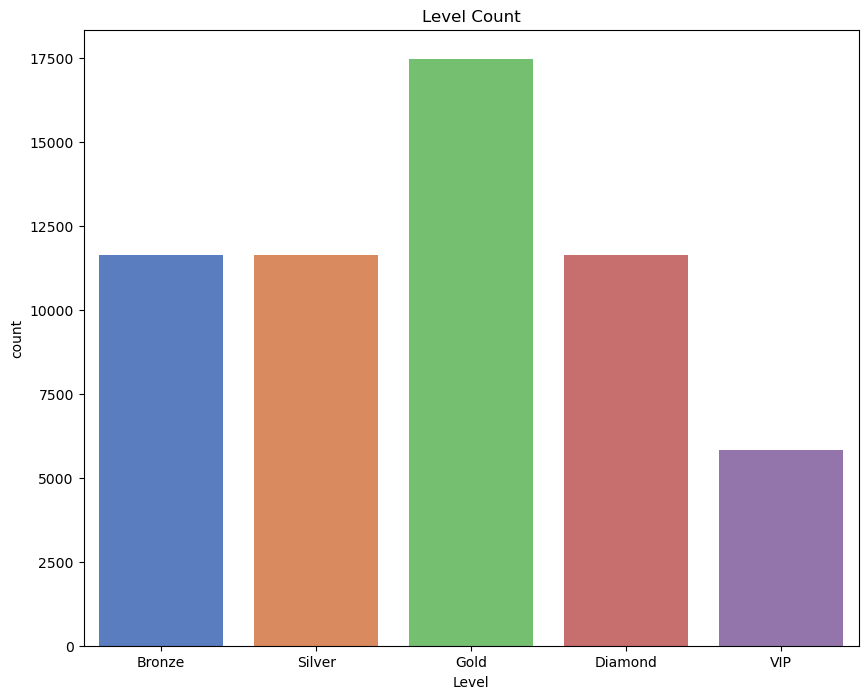

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
plt.subplots(figsize=(10, 8))
sns.countplot(x = 'Level', data=df, palette='muted', order=order)
plt.title('Level Count')
plt.show()

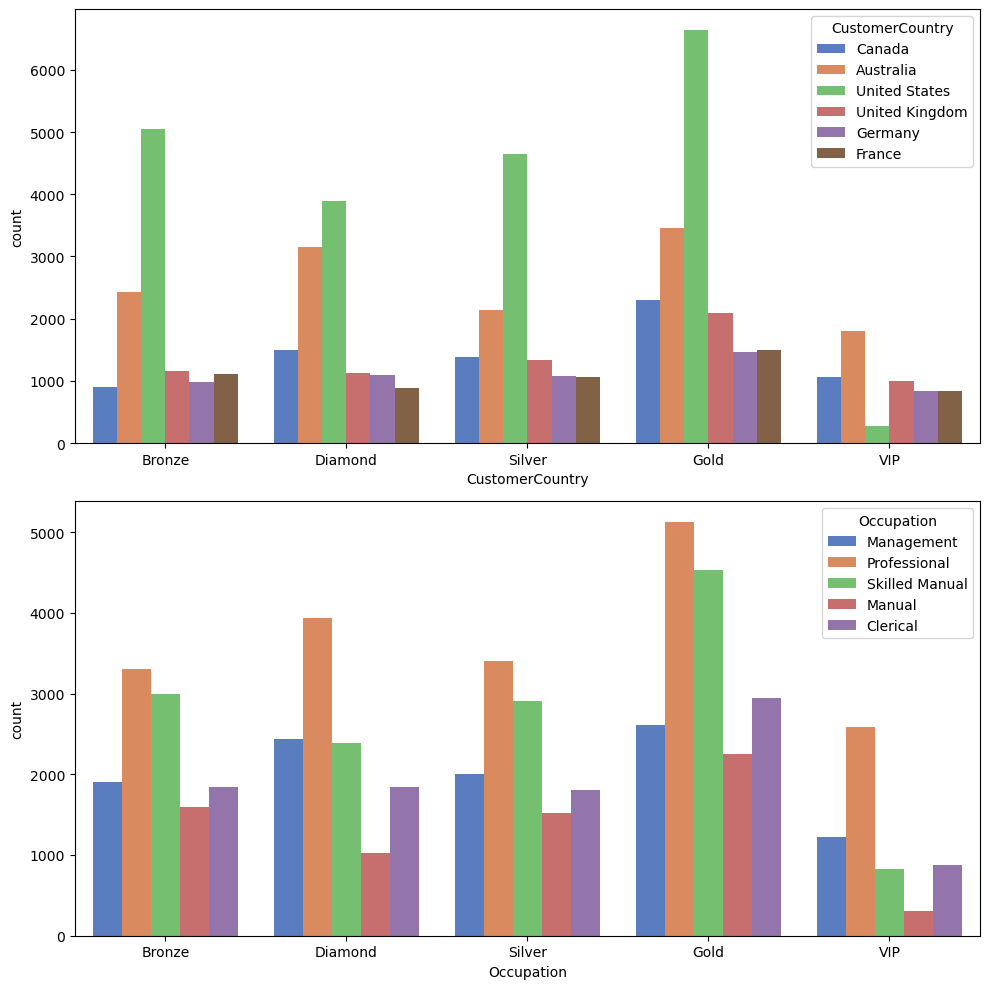

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

for i, col in enumerate(['CustomerCountry', 'Occupation']):
    sns.countplot(ax=axes[i], x='Level', data=df, hue=col, palette='muted')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

#### 📌 분석 결과
- VIP등급을 제외한 회원들 중 미국에 거주하는 회원이 가장 많았습니다. 미국은 'Bronze', 'Silver', 'Gold', 'Diamond'등금의 회원들이 주로 거주하는 지역으로 나타났다.
- 호주는 모든 등급에서 두번쨰로 많은 회원이 거주하는 지역입니다. 특히 'VIP' 등급의 회원들이 가장 많이 거주하는 지역으로 나타났다.
- 전문직(Professional)은 모든 등급에서 가장 많은 직업 군이다. 모든 등급에서 전문직이 가장 많은 걸로 나타났다.
- 다음으로는 기술직(Skilled Manual)이 많이 나타났다. 기술직도 모든 등급에서 두 번째로 많은 직업군이다.
- 생상직은 모든 등급에서 가장 적은 비율로 나타났다. 모든 등급에서 회원들 중 생산직인 회원수가 가장 적다.

#### 🔴 결과 
- 미국에서 자전거 관련 스포츠에 관심이 많다고 예측할 수 있다.
- 전문직이 자전거 관련 스포트에 관심이 많다고 예측할 수 있다.

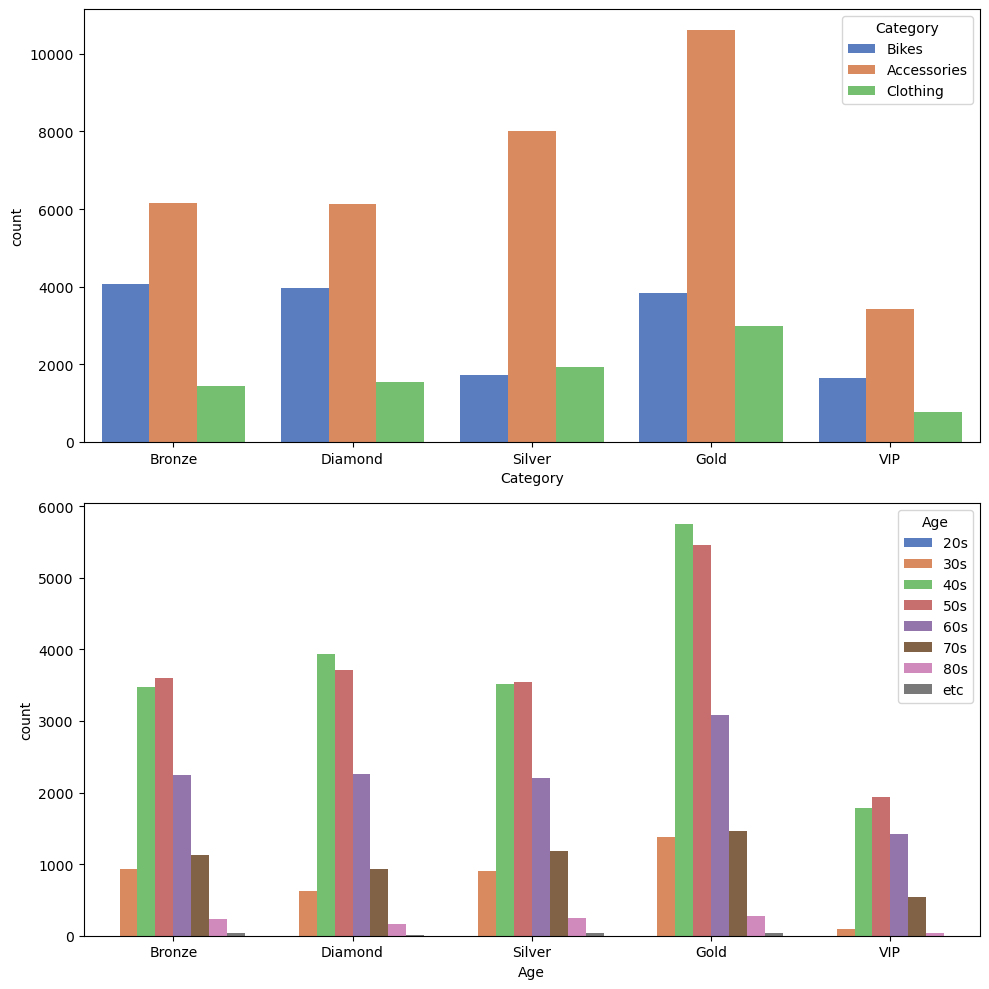

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

for i, col in enumerate(['Category', 'Age']):
    sns.countplot(ax=axes[i], x='Level', data=df, hue=col, palette='muted')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

#### 📌 등급별 카테고리 분석
- 모든 등급에서 부속품의 구매율이 높다.
- 실버등급을 제외하면 모든 등급에서 옷 구매율이 가장 낮다.
- 모든 등금에서 40대, 50대에서 높은 구매율을 보여주었다.
- 모든 등급에서 다음으로는 60대가 높은 구매율을 보여주었다.

#### 🔴 결과
- 자전거 관련 스포츠에는 부속품이 수요가 가장 많다고 할수 있다.
- 자전거 관련 스포츠에는 옷의 중요도가 낮다고 예측해 볼 수 있다.
- 건강을 중요시 생각하는 40대 50대 60대가 자전거 관련 스포츠에 관심이 많다고 예측해 볼 수 있다.

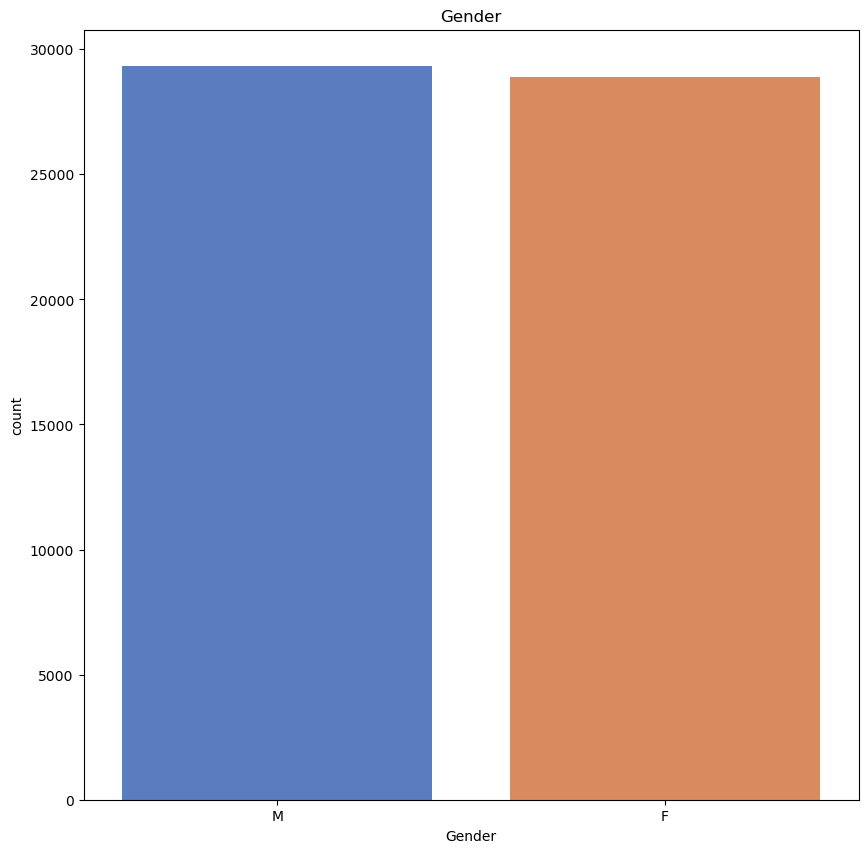

In [29]:
plt.subplots(figsize=(10, 10))
sns.countplot(x='Gender', data=df, palette='muted')
plt.title('Gender')
plt.show()

#### 📌 분석 결과
- 남성과 여성 비율이 근소한 차이를 보이고 있다.

#### 🔴 결과
- 자전거 관련 스포츠는 남녀를 구별하지 않고 모두에게 관심이 많은 스포츠라고 예측해 볼 수 있다.

#### ❓ 가설
- 구매가 활발한 전문직은 소득이 높을 것이다.

In [30]:
o_df = df.groupby('Occupation')['YearlyIncome'].mean().reset_index(name='MeanIncome')
o_df


Occupation    MeanIncome
0        Clerical  31555.555556
1      Management  94254.545455
2          Manual  16475.764355
3    Professional  76255.038675
4  Skilled Manual  52406.130830

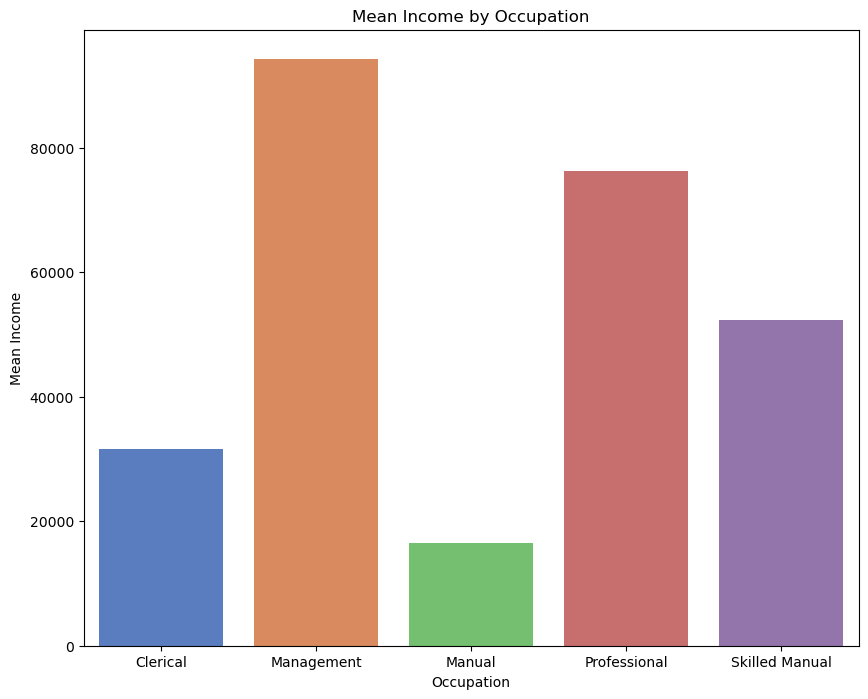

In [31]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Occupation', y='MeanIncome', data=o_df, palette='muted')
plt.title('Mean Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Mean Income')
plt.show()

#### 📌 분석 결과
- 소득이 높은 편에 속하는것은 맞지만 더 높은 관리직이 있었다.

#### ❓ 의문점
- 왜 전문직이 자전거 용품에 관심이 많을까
- 관리직은 소득이 높은데 왜 구매율이 낮을까

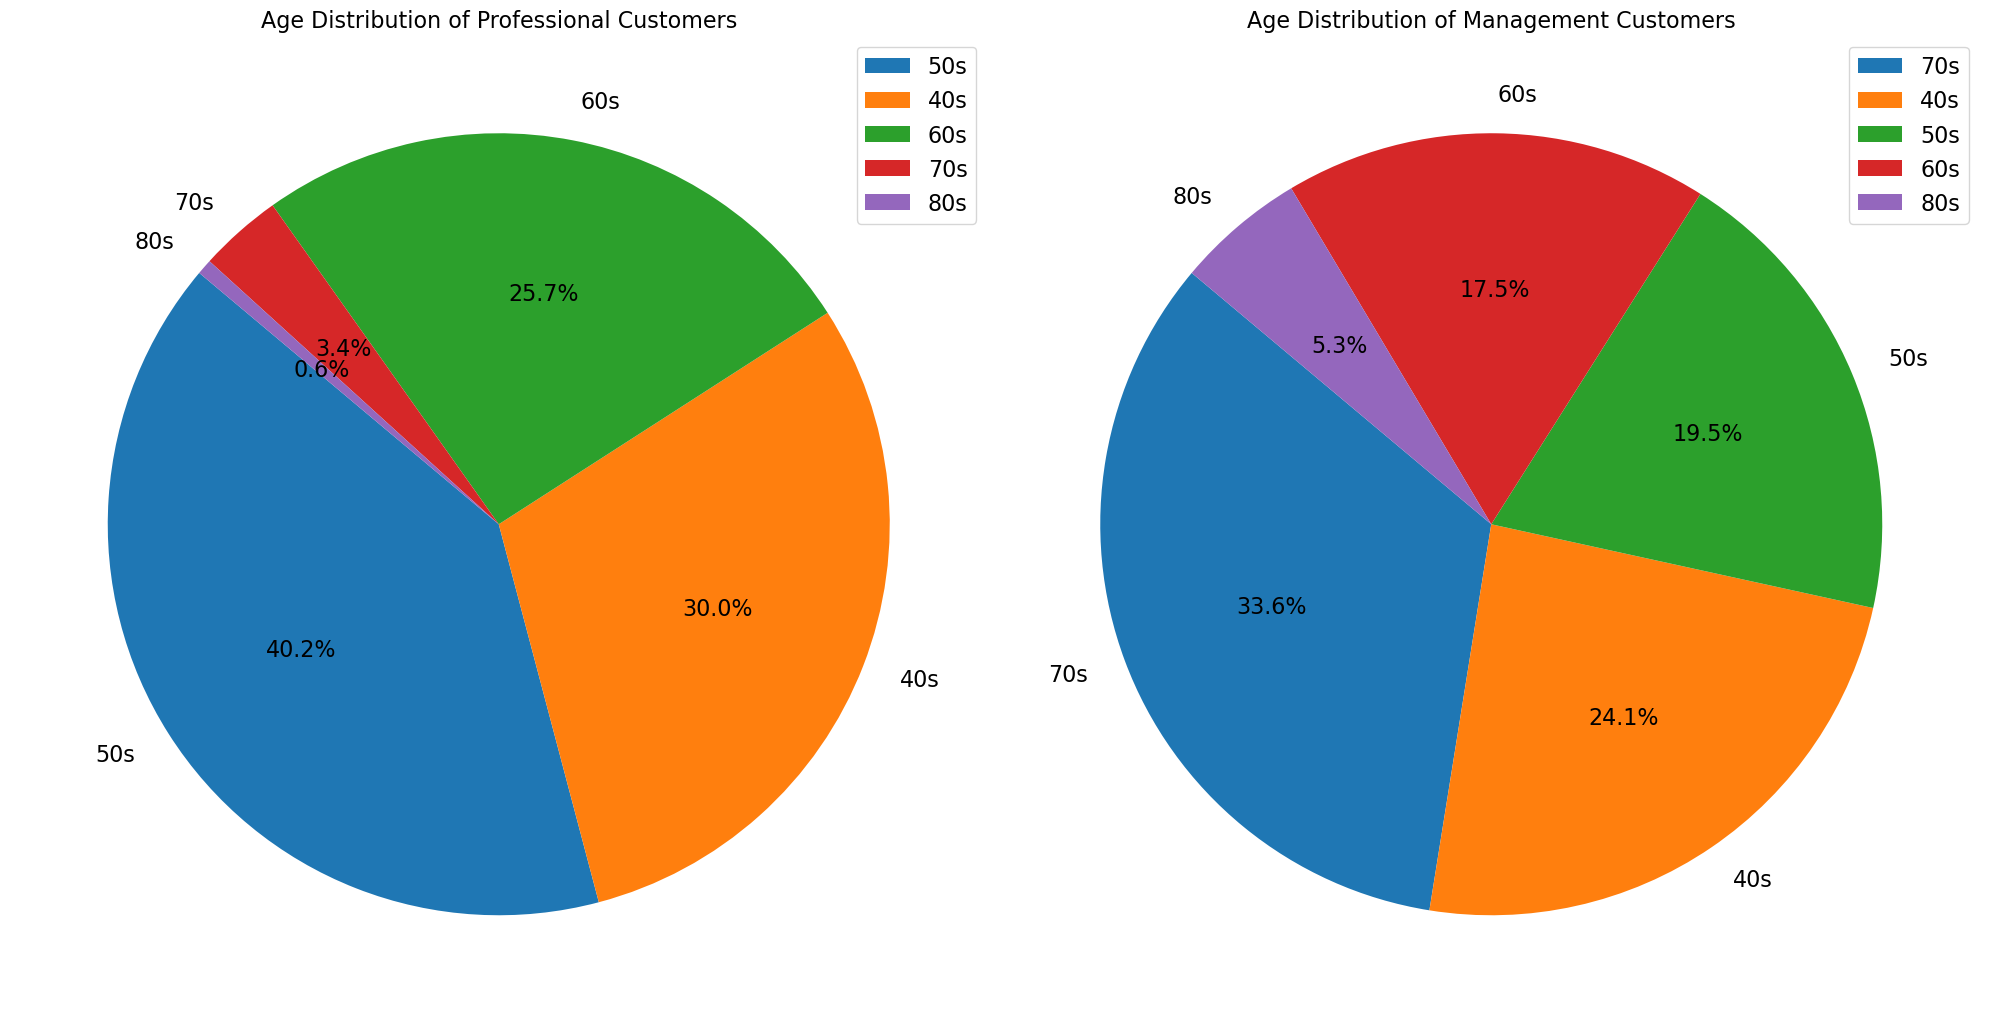

In [32]:
occupations = ['Professional', 'Management']

plt.figure(figsize=(20, 20))
colors = plt.cm.tab20.colors
for i, occupation in enumerate(occupations, start=1):
    occupation_df = df[df['Occupation'] == occupation]
    age_counts = occupation_df['Age'].value_counts()
    age_counts = age_counts.drop(['20s', '30s', 'etc'], errors='ignore')
    plt.subplot(1, len(occupations), i)
    plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 16})
    plt.title(f'Age Distribution of {occupation} Customers' ,fontsize=16)
    plt.legend(fontsize=16)

plt.tight_layout()
plt.show()

#### 📌 분석 결과
- 전문직은 재구매율이 높았던 40대 50대 60대가 비중이 높았다.
- 관리직은 재구매율가 비교적 낮았던 70가 비중이 높았다.

#### 🔴 결론
- 자전거 관련 판매에는 소득과 직종보다는 나이대가 중요하다.
- 특정 나이대를 타겟으로한 마케팅이 필요하다.

#### ❓ 가설
- 부속품이 판매율이 제일 높았으니 40대 50대 60대가 주로 구매하는 카테고리도 부속품일 것이다
- 미국에서 구매율이 높았으니 40대 ~ 60대 회원들중 미국에 거주하는 회원이 많을 것이다.

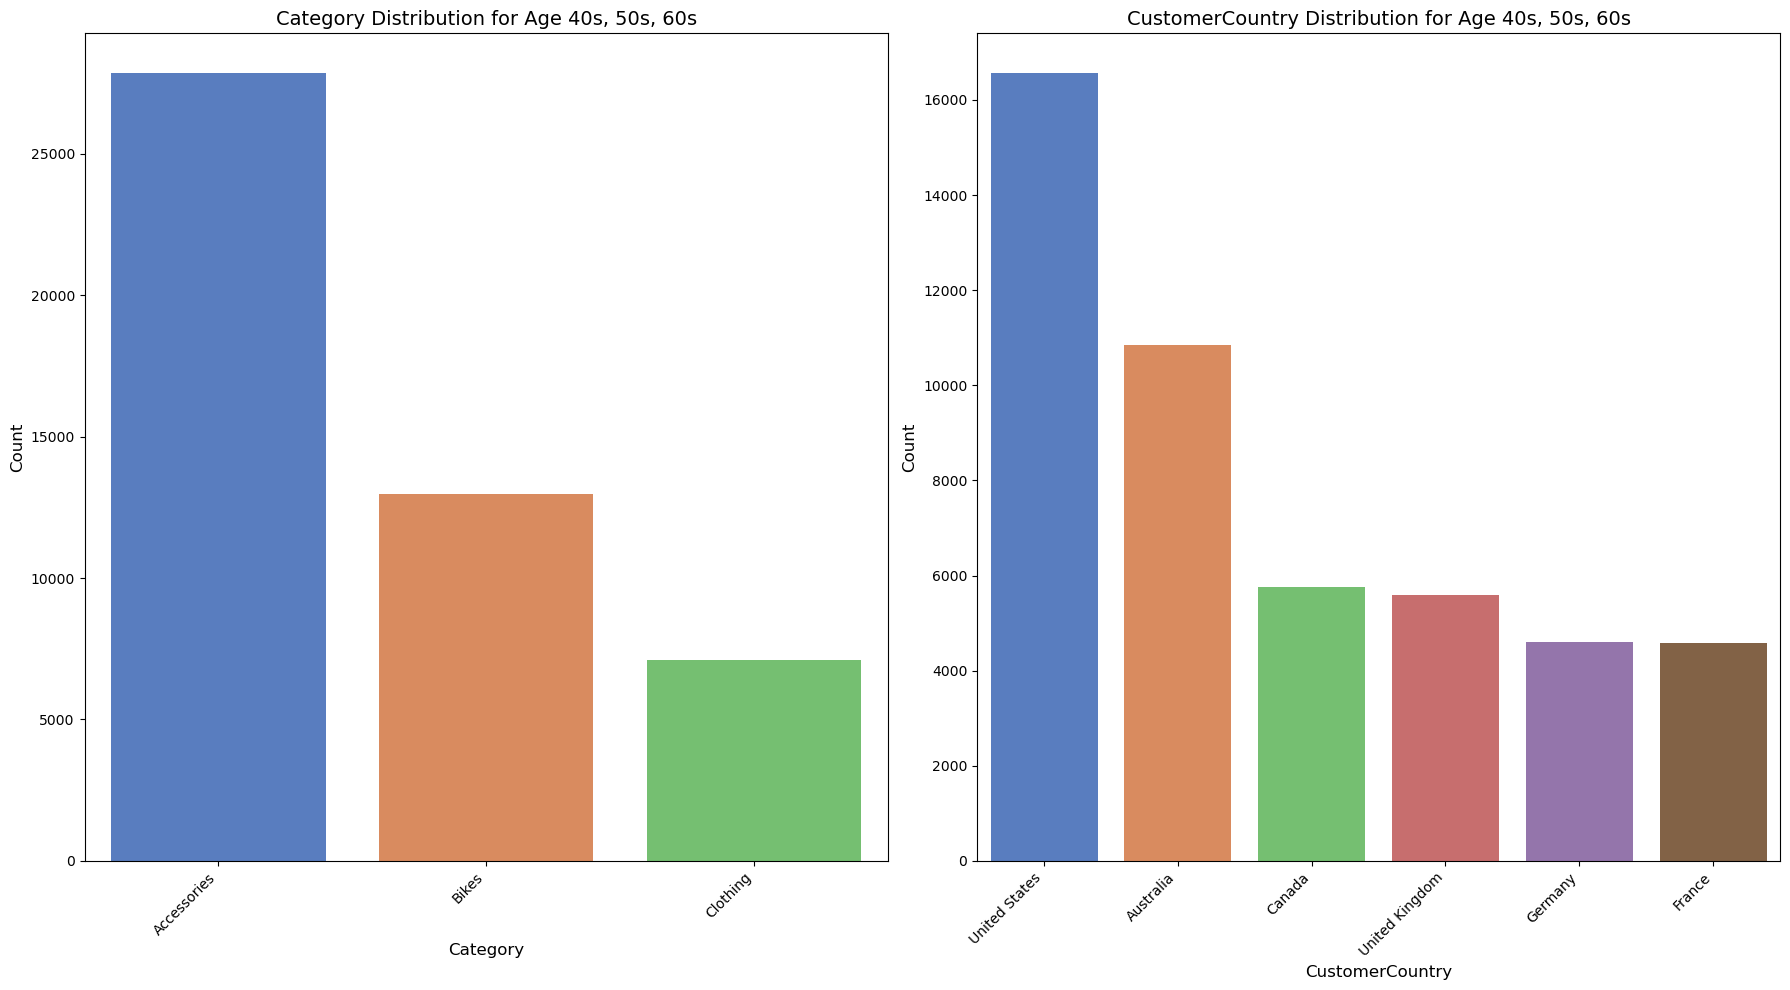

In [33]:
age_categories = ['40s', '50s', '60s']
filtered_df = df[df['Age'].isin(age_categories)]

category_counts = filtered_df['Category'].value_counts()

country_counts = filtered_df['CustomerCountry'].value_counts()

plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
sns.barplot(x=category_counts.index, y=category_counts.values, palette='muted')
plt.title('Category Distribution for Age 40s, 50s, 60s', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.subplot(1, 2, 2)
sns.barplot(x=country_counts.index, y=country_counts.values, palette='muted')
plt.title('CustomerCountry Distribution for Age 40s, 50s, 60s', fontsize=14)
plt.xlabel('CustomerCountry', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

#### 📌 분석 결과
- 재구매가 높은 40대 ~ 60대 회원들은 부속품 재구매를 많이 한다.
- 재구매가 높은 40대 ~ 60대 회원들은 미국에 많이 거주한다. 그 뒤로 호주에 많이 거주한다.

#### ✔ 데이터분석 요약
자전거 관련 스포츠 시장은 미국과 호주를 중심으로 성장하고 있는 것으로 나타났다. 미국은 'Bronze', 'Silver', 'Gold', 'Diamond'등급의 고객들이 주로 거주하며, 호주는 다음으로 많은 고객이 거주하는 지역이다. 특히 'VIP'고객들이 호주에 많이 거주하고 있다. 40대 ~ 60대 고객들이 자전거 관련 스포츠에 가장 큰 관심을 보이는 나이대로 확인되었다. 40대 ~ 60대 고객들은 주로 전문직에 많이 종사하고 있다.


### 📝마케팅 전략

#### 1️⃣ 지역 타겟팅
- 미국과 호주를 중심으로 자전거 관련 스포츠 제품에 대한 마케팅을 집중할 필요가 있어보인다. 특히 미국에서는 'Bronze', 'Silver', 'Gold', 'Diamond'등급의 회원을 중심으로 타겟팅 하여 마케팅 전략을 구성해야한다. 미국과 호주가 자전거 관련 스포츠에 관심이 높아 보임으로 흥미를 느낄수 있는 자전거 대회 등과 같은 이벤트를 개최해 이들이 자전거에 흥미를 잃지 않게 해 고객을 유지하는 마케팅 전략이 필요하다

#### 2️⃣ 직업 타겟팅
- 전문직과 기술직 직종에 종사하는 고객들을 중심으로 마케팅을 구성해야한다. 이 직종군의 회원들이 자전거 관련 스포츠에 높은 관심을 보이고 있으므로 설문조사를 통해 이들의 선호와 요구를 파악하고 이에 맞는 제품과 콘텐츠를 제공할 필요가 있다.

#### 3️⃣ 나이 타겟팅
- 40대부터 60대까지의 고객이 자전거 관련 스포츠 제품에 높은 구매력을 보이고 있다. 이 나이대를 중심으로 건강과 관련있는 캠페인을 개최 하고 상품을 개선, 개발하는 전략이 필요하다. 또는 건강 관련 미디어에 의사와 같은 신뢰가 높은 직업군을 초청해 자전거와 건강의 연관성을 홍보하는 전략이 필요하다.

#### 4️⃣ 카테고리 타겟팅
- 자전거 관련 스포츠 시장에서 부속품에 대한 수요가 높은 것으로 확인 되었다. 부속품에 대한 마케팅을 강화하여 자전거 사용자들의 편의성을 높일 수 있는 제품들을 중점적으로 홍보해야한다. 